# Plot and Fit a Straight Line

## Authors
B.W. Holwerda

## Learning Goals

* How to fit a line to well-behaved data
* The $\chi^2$ diagnostic
* Fitting with and without errors taken into account.

## Keywords
Line fits, diagnostics, $\chi^2$

## Companion Content
-- 

## Summary

A line fit is the most fundamental model for most physical sciences. But there are multiple ways to apply one. Which one is best? How to choose? Should one take errors into account? 

<hr>


## Student Name and ID:



## Date:

<hr>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(15) #set seed for reproducibility purposes
x = np.arange(10) 
y = 2*x + 5 + np.random.randn(10) #generate some data with random gaussian scatter
dy = np.random.rand(10) #these are the uncertainties

### Exercise 1

plot the data

In [7]:
# student work


### Exercise 2

plot the data with the errorbars.

In [8]:
# Student work here


## Fitting a Line

Fit a straight line.

In [9]:
# This fits the data without taking uncertainties into account
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [10]:
# print slope and intercept

### Exercise 3 

Plot the *linear regression* fit on top of the data.

In [11]:
# student work here


In [12]:
# use polyfit
slope2,intercept2 = np.polyfit(x,y,deg=1,w=1/dy)
slope2, intercept2

(2.1503799185903665, 3.2365102504903334)

### Exercise 4 

Plot the *linear regression* and Polyfit fit on top of the data.

* show the errors.
* distinguish between the two fits.

In [13]:
# student work here

### Exercise 5

Which one of these two fits takes the error in the data into account?


*your answer here*

### Model fitting from scratch. 

Let's now implement the $\chi^2$ approach.

The $\chi^2$ is defined as the sum of all the differences between model values -f(x)- and data -y- squared normalized by the error quared or:

$$ \chi^2 = \Sigma { (y - f(x) )^2  \over \sigma^2 }$$

If you have several fits using the *same number of degrees of freedom* this is a useful metric if the 
In the case of a straight line, the fit function f(x) has two degrees of freedom, the slope and the intercept.

Benefits: 
* includes the (Gaussian) error for the measurements.
* compares model and data directly
* Single number diagnostic of the quality of the fit.

Drawbacks:
* The errors are assumed to be Gaussian and representative of the variance in the data.
* Tells you little whether the model has the right number of degrees of freedom.

If you want to account for the number of degrees of freedom, we use the *reduced $\chi^2$*. This is the $\chi^2$ divided by the number of degrees of freedom:

$$ reduced ~ \chi^2 = {\chi^2 \over N_{DOF} }$$

The parameters I want to fit are *slope, intercept*.

Just by looking at the data I can tell that the slope should be somewhere between 1 and 3, and the intercept between 2.5 and 6.5.

Our grid of possible models would then be

In [24]:
slopes = np.linspace(1,3,100) 
intercepts = np.linspace(2.5,6.5,100)
#note: these are already 10,000 models (curse of dimensionality!)

For convenience, we can define two functions that describe our model (a straight line) and the chi2 function:

In [25]:
def model(x,m,b):
    return m*x+b #straight line

def chi2(m,b,x,y,err):
    return np.sum(((model(x,m,b) - y)**2)/err**2)

This line calculate chi2 values for our 10,000 combinations

In [26]:
allchi2 = np.array([[chi2(m,b,x,y,dy) for m in slopes] for b in intercepts])

In [27]:
allchi2.shape

(100, 100)

The next step is to figure out what (slope,intercept) pair gives the minimum chi2. This can be done with np.argmin 
but the index of the minimum is calculated after flattening the array, so we need to use a trick to get the indices for rows and columns.

In [28]:
print(allchi2.min()) #min chi2 value
print(allchi2.argmin()) #index of min on flattened array
print(np.unravel_index(allchi2.argmin(), allchi2.shape)) #indices of minimum value as a (row, col) pair

186.213920155
1857
(18, 57)


In [29]:
#note that the inner (second) index is for slopes, the outer(first) index is for intercepts

print(slopes[57],intercepts[18]) #comes up pretty close to the result of np.polyfit.

2.15151515152 3.22727272727


In [ ]:
#### Exercise 5

plot the best fit with the lowest $\chi^2$


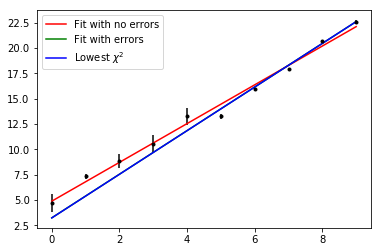

In [30]:
# plot the best fit with the lowest \chi^2

plt.errorbar(x,y,yerr=dy,marker='.',c='k',ls='None');
plt.plot(x, slope*x+intercept,'r-',label = 'Fit with no errors')
plt.plot(x, slope2*x+intercept2,'g-',label = 'Fit with errors')
plt.plot(x, slopes[57]*x+intercepts[18],'b-',label = 'Lowest $\chi^2$')

plt.legend();



### Exercise 6: 

What is the difference between the linear regression method and the polyfit one?

How could we make polyfit act like the linear regression fit? 

* your answer here*